# Recurrent Neural Network

Recurrent Neural Network is a class of NN designed for processing variable-length input and output sequences

in feedforward nets, hidden states are completely determined by **current input**

In RNN, hidden states are determined by both **current input and previous hidden state**

memory capacity of RNNs is determined by size of hidden state and number of layers



<img src='https://indiantechwarrior.com/wp-content/uploads/2022/06/recurrent-neural.png' />

application: time series, sequence-to-sequence NLP tasks, and any context where sequential dependencies are important.

- a single RNN (SRN/LSTM/GRU) can do language modelling (word/character-level), sequence labelling (e.g., POS-Tagging, sementic role labeling), text classification (e.g., sentiment analysis, language acceptance), text traduction (e.g., parsing), but can't do machine translation because length of output sequence can be different from input sequence

- a RNN encoder-decoder can do machine translation

## comparison of unit of Feedforward NN, SRN, LSTN, GRU 

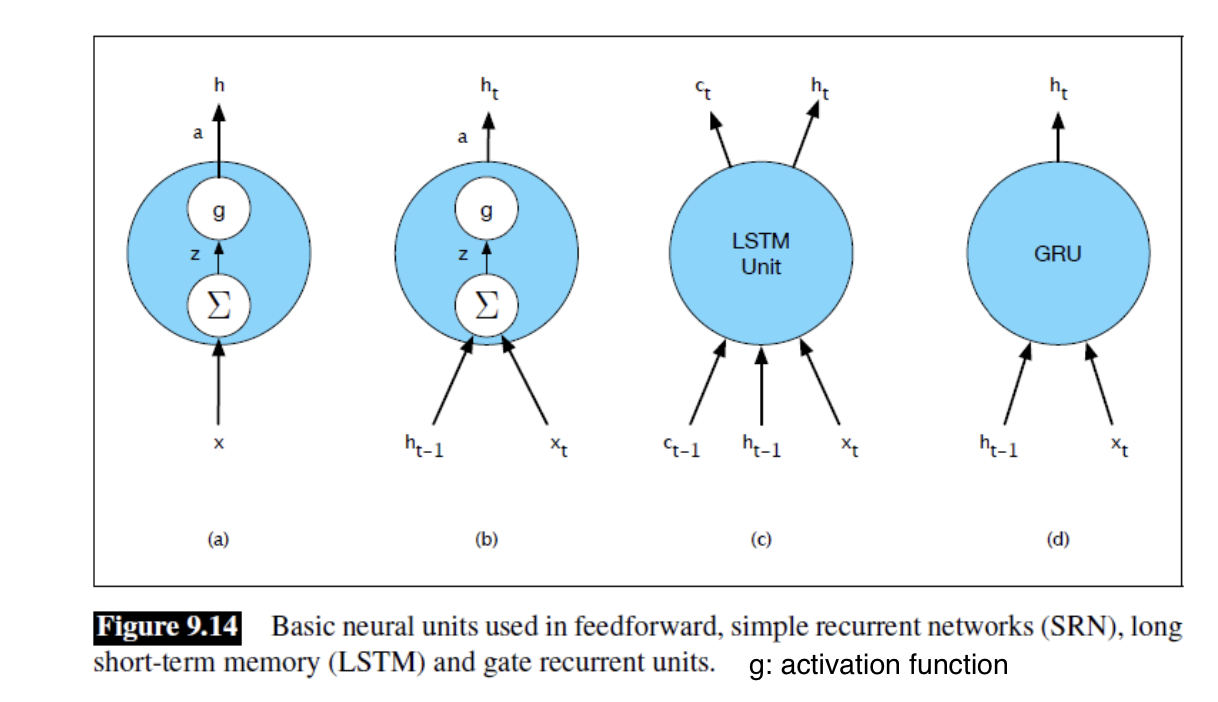

## Comparison of units in SRN, LSTM, GRU

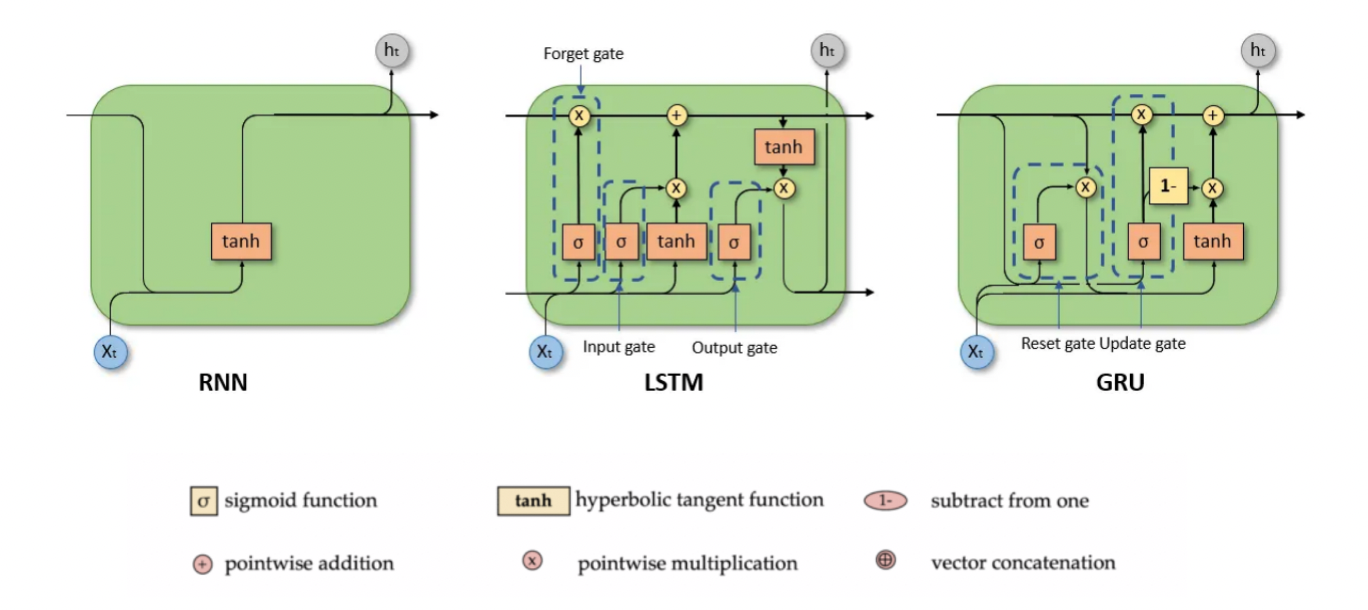

## backpropagation through time (BPTT)

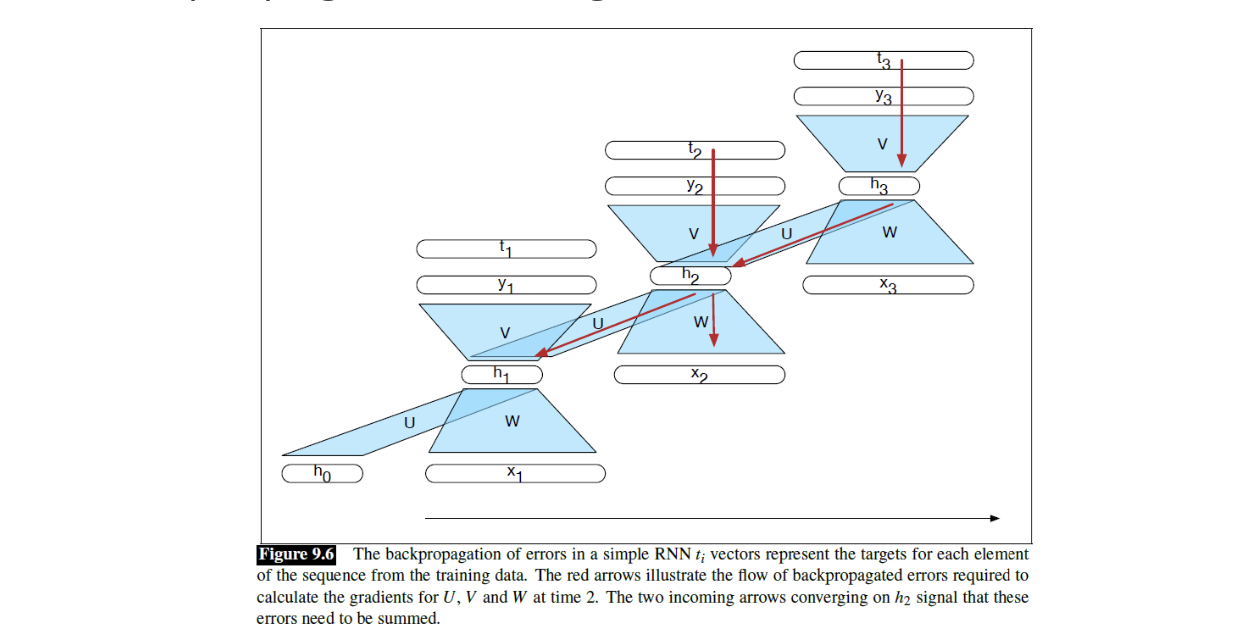

Backpropagation Through Time (BPTT): A training algorithm for recurrent neural networks (vanilla RNN, LSTM, GRU) that extends the standard backpropagation technique to handle sequences.

- Sequence processing: RNNs process input sequences, maintaining a hidden state that captures information from previous time steps.

- Unrolling: BPTT unrolls the RNN through time, Network layers are copied for each timestep, creating a feedforward network-like structure with multiple time steps, allowing the application of standard backpropagation.

- Computing gradients: by starting at time t, BPTT computes gradients of loss function w.r.t network parameters on successively preceding time steps by backpropagating the error from output layer to the input layer across time steps, summing gradients as you proceed.

- Weight sharing: RNNs use shared weights $U, V, W$ across all time steps, so the gradients are accumulated from all time steps before updating the weights.

truncated BPTT: addressing the issues of long training time and vanishing/exploding gradients.

- hyperparameter: number of time steps considered in the gradient computation, 

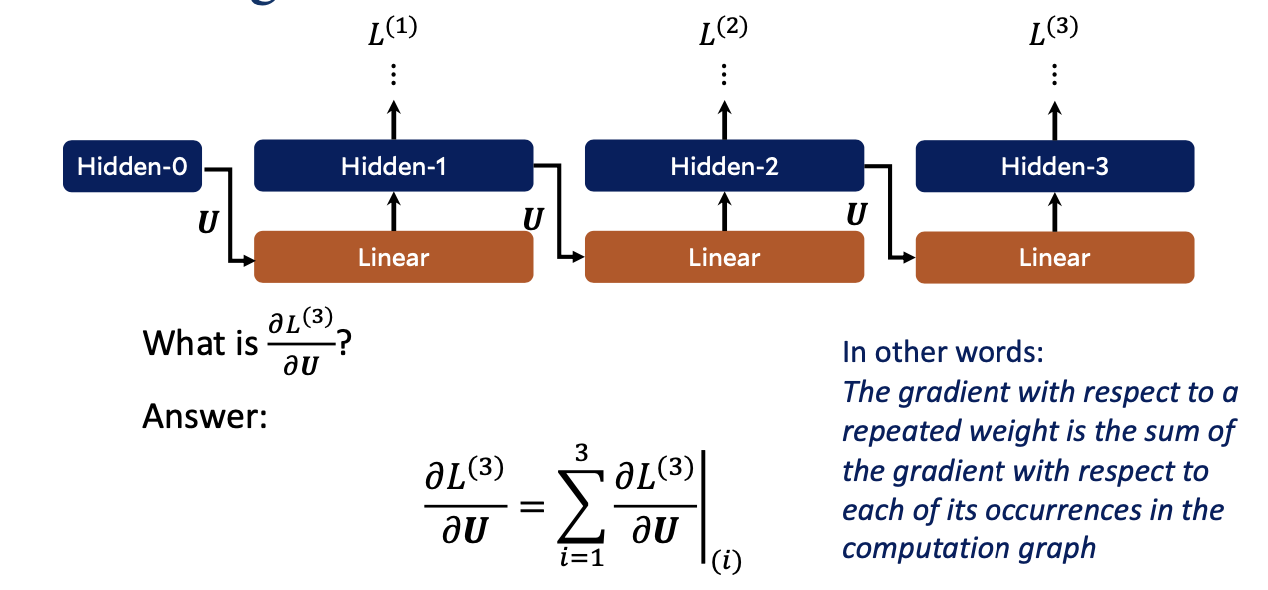

## teacher forcing

Teacher forcing is a training technique used in seq-to-seq models, forcing "forces" the model to learn from the correct output sequence.

- training: input to decoder at each time step is **ground truth target sequence**, rather than using predicted output from the previous time step as input.

- inference: input to decoder is its own predictions from previous time steps.


problem: 

- Exposure bias and overfitting: model may not learn to handle its own errors during inference.

- solution: scheduled sampling or curriculum learning

    initially trained with teacher forcing, then gradually transitions to using its own predictions as input during the training process.

## variants: stacked, bidirectional

<img src='https://www.researchgate.net/publication/311839720/figure/fig7/AS:668881144270860@1536485100547/Illustrations-of-normal-RNN-stacked-RNN-and-bidirectional-RNN.png' />

# SRN (Simple Recurrent Network)

- A SRN is a unidirectional recurrent neural network with **one hidden layer** of simple RNN units.

- SRN can capture short-term dependencies in sequential data but suffer from vanishing and exploding gradient problems when dealing with long sequences.

- hidden layers are determined both by **current input $\mathbf{x}_{t}$ and previous input $\mathbf{x}_{t-1}$**.

## Architecture

For each time step $t$

- Input: t-th token of input sequence

- Embedding layer: $\mathbf{x}_t = \text{MLP}(w_t)$

- Hidden layer: $\mathbf{h}_t= \tanh(\mathbf{U} \mathbf{h}_{t-1}+\mathbf{W}\mathbf{x}_t + \mathbf{b}^{(1)} )$

- Output layer: $\mathbf{o}_t= \mathbf{V}\mathbf{h}_t+ \mathbf{b}^{(2)}$

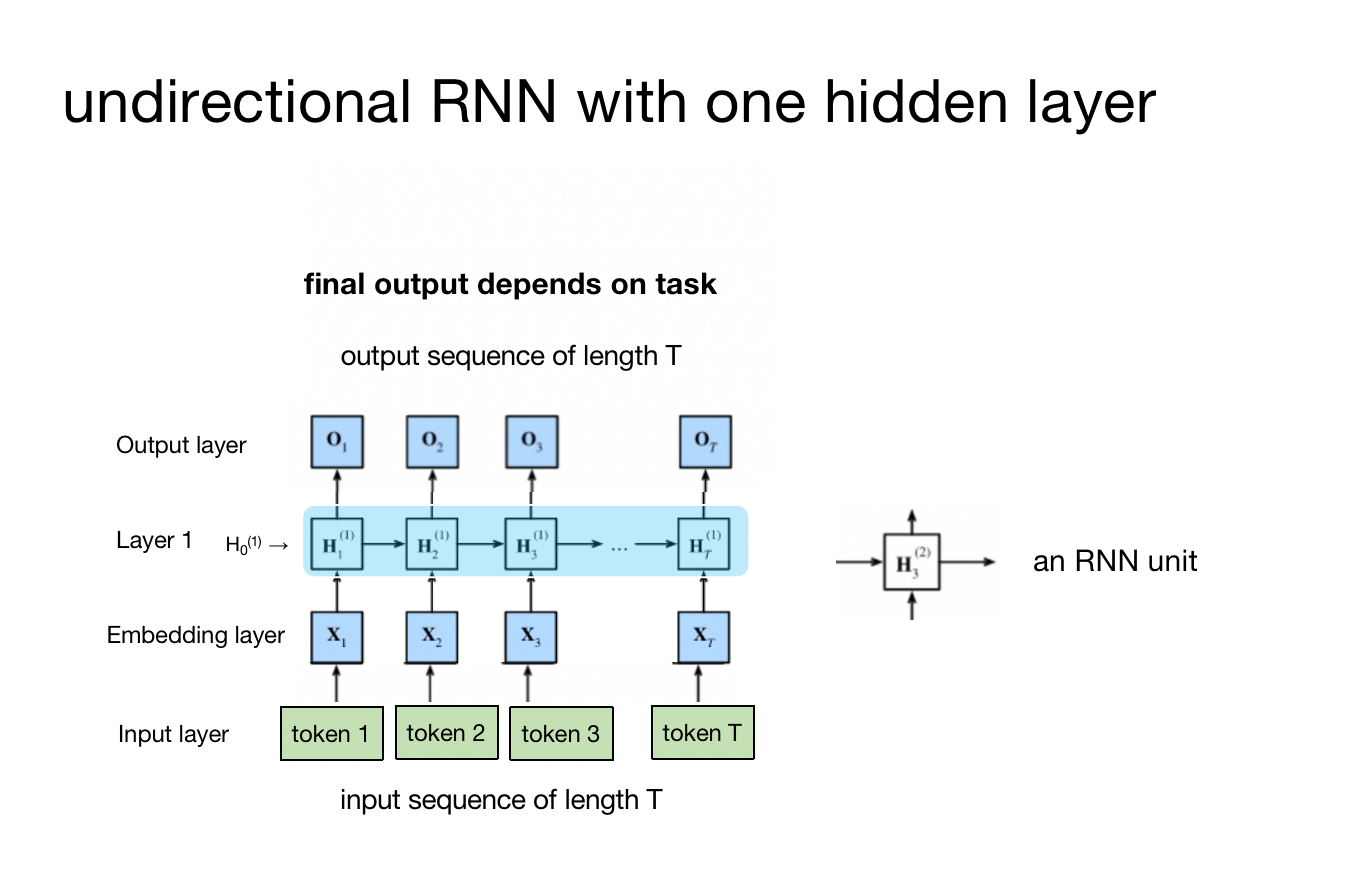

## training algorithm

1. SRN initialization

    - initialize first hidden state $\mathbf{h}_0$ to $\mathbf{0}$

    - randomly initialize recurrent weight matrix $\mathbf{U}$ , input weight matrx $\mathbf{W}$ and output weight matrix $\mathbf{V}$.

2. input: a sequence of $n$ tokens (word or character)

3. output: a sequence of length $T$ $[\mathbf{o}_1, ..., \mathbf{o}_n]^T$

4. final output depending on task,  can be 

    - seq2seq: a sequence of length $n$ $[\mathbf{y}_1, ..., \mathbf{y}_T]^T$

        $$\mathbf{y}_t=\text{softmax}(\mathbf{o}_t)$$

    - classification: a single label $\mathbf{y}_T$ calculated from **output layer at time step $T$**

        $$\mathbf{y}_T=\text{softmax}(\mathbf{o}_T)$$

5. compute cross entropy loss and SGD to update weights

<img src='https://miro.medium.com/v2/resize:fit:1400/1*xn5kA92_J5KLaKcP7BMRLA.gif' />

## application

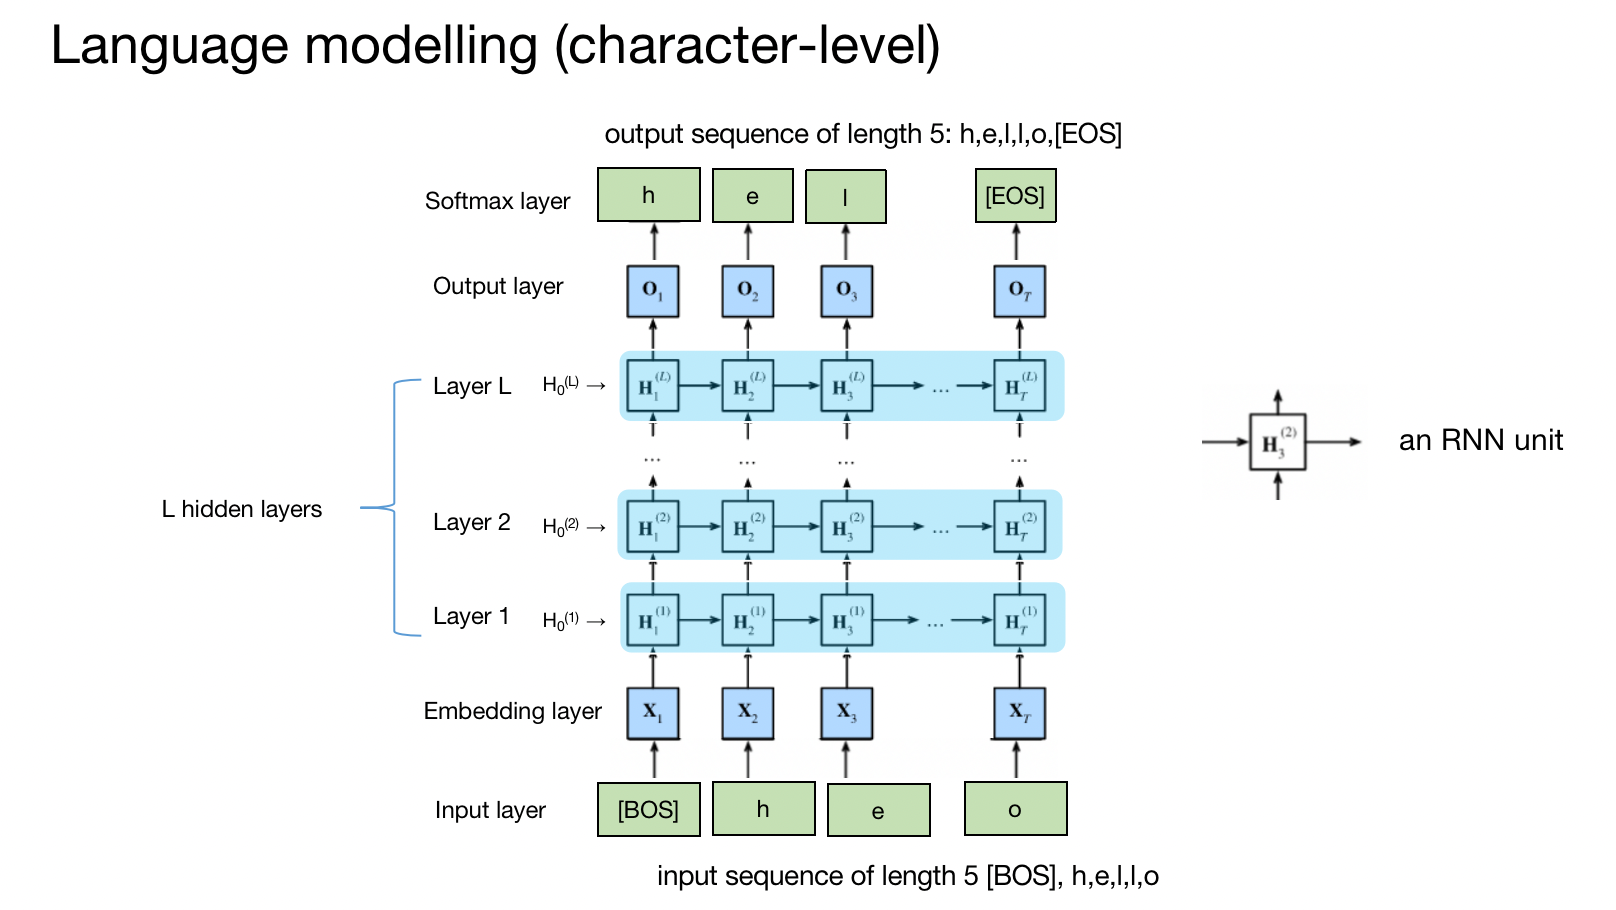

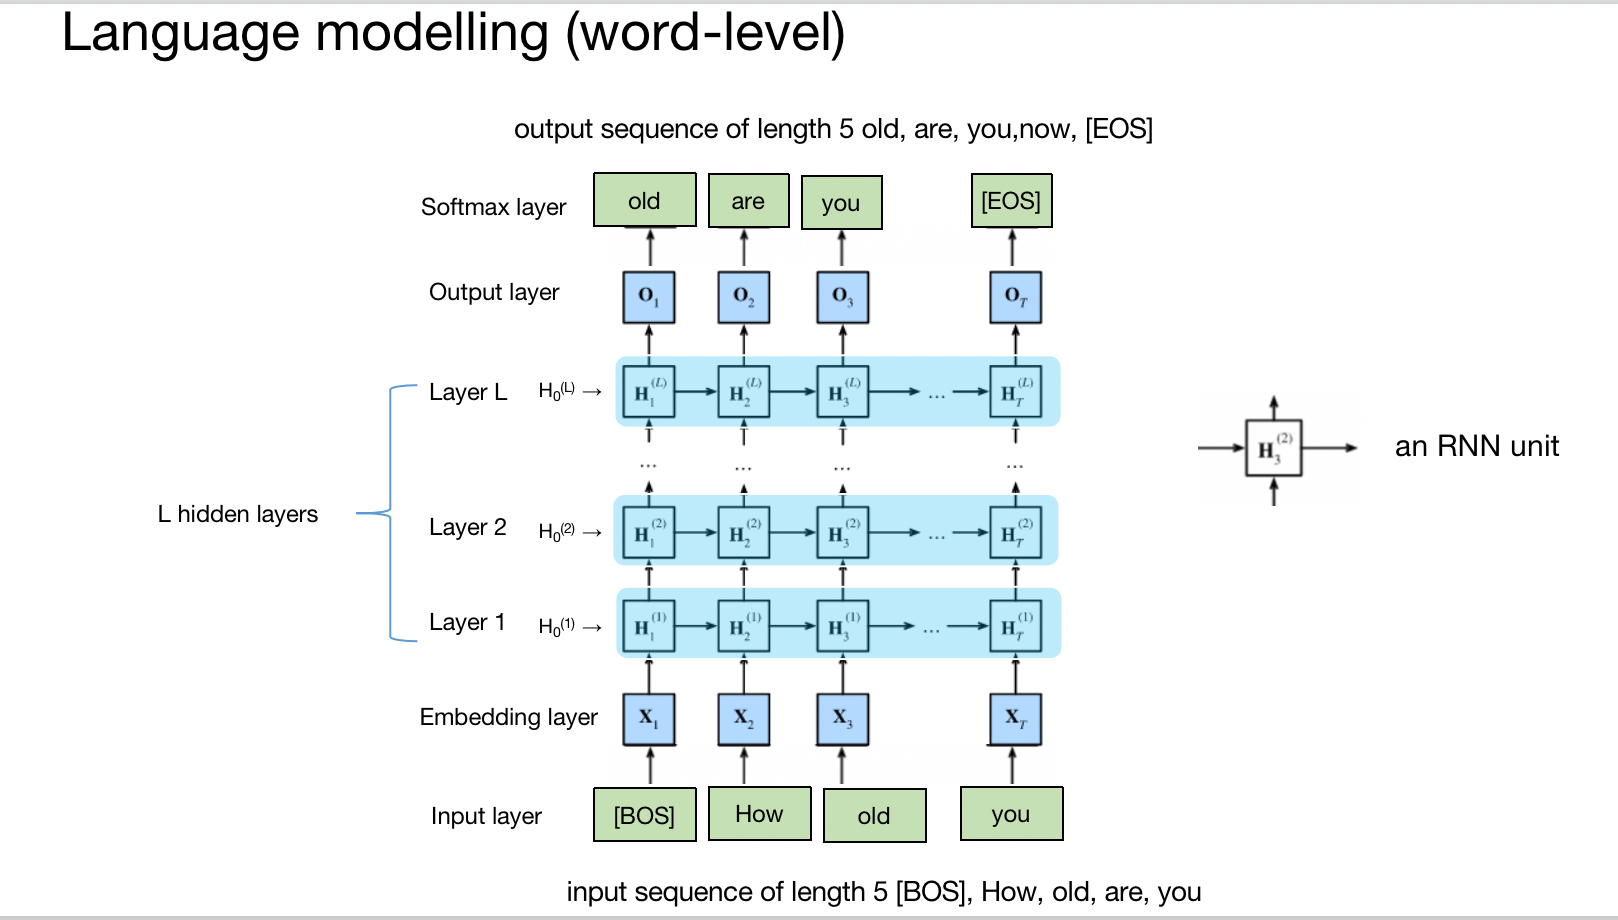

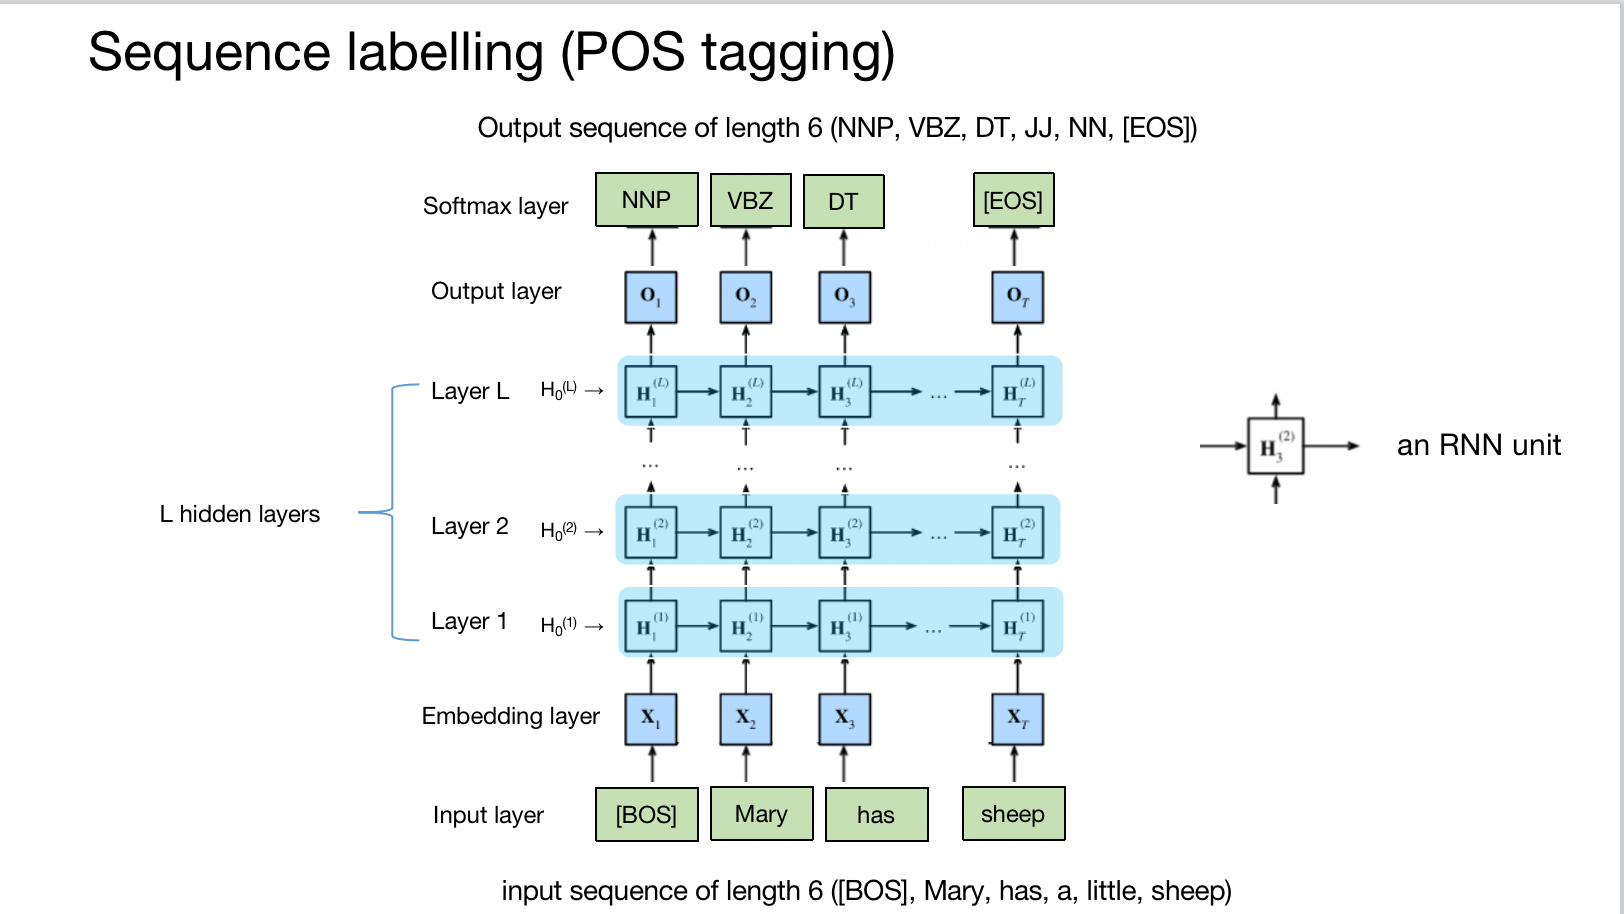

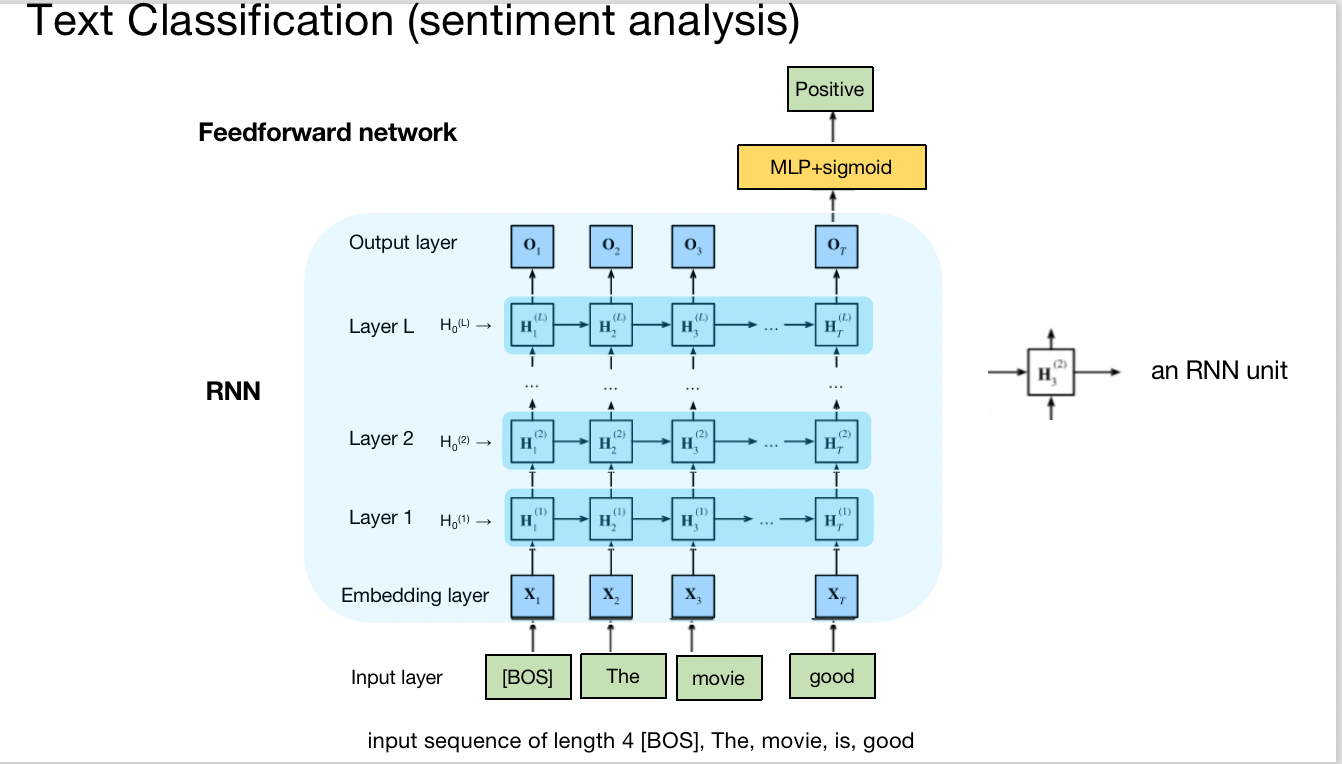

## limitation

These limitations led to the development of more advanced RNN architectures, such as **Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) networks**

**Vanishing gradient problem**:

- Occurs when gradients of loss w.r.t weights become very small during backpropagation.

- Caused by long sequences and repeated multiplication of gradients through time, resulting in gradients exponentially decreasing as they move back through the sequence.

- Leads to difficulties in learning long-range dependencies, as the effect of earlier inputs on the final output is diminished.


**Exploding gradient problem**:

- Occurs when gradients of loss w.r.t weights become very large during backpropagation.

- Caused by long sequences and repeated multiplication of gradients through time, resulting in gradients exponentially increasing as they move back through the sequence.

- Leads to unstable learning and difficulty in convergence, as large gradients can cause the **model parameters to oscillate or diverge**.


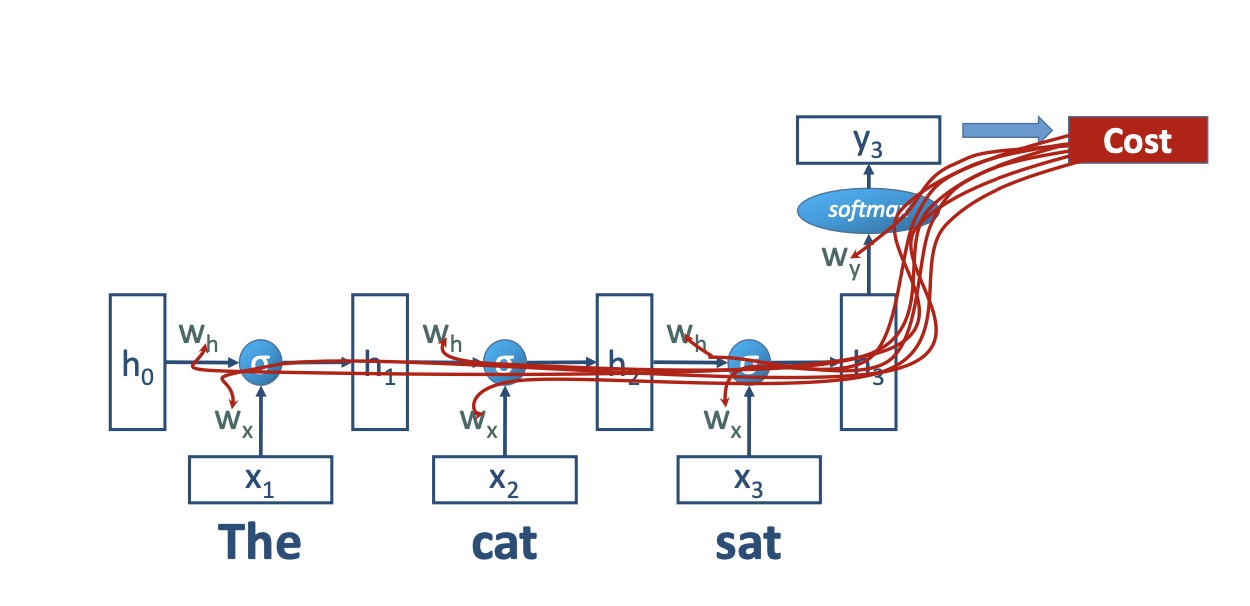

**Proof**

Given a SRN with one hidden layer and a softmax output layer

loss is cross-entropy loss.

$\mathbf{U}$ is recurrent weights, $\mathbf{W}$ is input weights, $\mathbf{V}$ is output weights

$\mathbf{z}$ is intermediate variable, $\mathbf{h}$ is activation, $\sigma$ is sigmoid

$$
\mathbf{z}_t= \mathbf{U h}_{t-1}+\mathbf{W x}_t + \mathbf{b}
$$

Loss at time step $t$: cross-entropy $\mathbf{L}_t= - \mathbf{y}_t\log(\mathbf{\hat y_t})$

gradient of intermediate variable w.r.t recurrent weights contains 2 terms of derivative of sigmoid (colored red) $\frac{\partial \sigma(x)}{\partial x}=\sigma(x)(1-\sigma(x))$

\begin{aligned}
\frac{\partial \mathbf{L^{(3)}}}{\partial \mathbf{U}} &= \frac{\partial \mathbf{L^{(3)}}}{\partial \mathbf{y^{(3)}}} \frac{\partial \mathbf{y^{(3)}}}{\partial \mathbf{h^{(3)}}} \frac{\partial \mathbf{h^{(3)}}}{\partial \mathbf{z^{(3)}}} \frac{\partial \mathbf{z^{(3)}}}{\partial \mathbf{U}}\\[1em]
\frac{\partial \mathbf{z^{(3)}}}{\partial \mathbf{U}} 
&= \mathbf{U}\frac{\partial \mathbf{h^{(2)}}}{\partial \mathbf{U}} + \frac{\partial \mathbf{U }}{\partial \mathbf{U}}\mathbf{h^{(2)}} \\
&= \mathbf{U}\left(\frac{\partial \mathbf{h^{(2)}}}{\partial \mathbf{z^{(2)}}}\frac{\partial \mathbf{z^{(2)}}}{\partial \mathbf{U}}\right) + \mathbf{h^{(2)}} \\
&= \mathbf{U}\left(\frac{\partial \mathbf{h^{(2)}}}{\partial \mathbf{z^{(2)}}}\left(\mathbf{U}\frac{\partial \mathbf{h^{(1)}}}{\partial \mathbf{U}} + \mathbf{h}^{(1)}\right)\right) + \mathbf{h^{(2)}} \\
&= \mathbf{U}\left({\color{red}{\frac{\partial \mathbf{h^{(2)}}}{\partial \mathbf{z^{(2)}}}}}\left(\mathbf{U}\left({\color{red}{\frac{\partial \mathbf{h^{(1)}}}{\partial \mathbf{z^{(1)}}}}}\left(\mathbf{U}\frac{\partial \mathbf{h^{(0)}}}{\partial \mathbf{U}} + \mathbf{h}^{(0)}\right)\right) + \mathbf{h}^{(1)}\right)\right) + \mathbf{h^{(2)}} \\
\end{aligned}

# BiRNN (bidirectional RNN)

**architecture**

- processes the input sequence in both forward and backward directions.

- each layer has 2 separate RNNs: forward and backward hidden states are calculated separately for each layer

    - forward RNN: left to right processing
    
    - backward RNN: right to left processing

- Each layer generates its own hidden state sequences, which are then combined to create a single output sequence.

**Advantages**:

- Captures both past (forward) and future (backward) context, leading to richer representations.

- Better at handling long-range dependencies compared to unidirectional RNNs.

- Improved performance in various NLP tasks such as sequence labeling, sentiment analysis, and machine translation.

## simple BiRNN

**architecture for a bidirectional RNN with one hidden layer**

at time step $t$

- Forward hidden state: $\mathbf{h}_t^{(f)} = f(\mathbf{h}_{t-1}^{(f)}, \mathbf{x}_{t})$

- Backward hidden state: $\mathbf{h}_t^{(b)} = f(\mathbf{h}_{t+1}^{(b)}, \mathbf{x}_{t})$

- Output at time step t: $\mathbf{o}_t = g(\mathbf{h}_t^{(f)}, \mathbf{h}_t^{(b)})$

where
- $f$ is RNN function for updating hidden states, can be SRN/LSTM/GRU
- $g$ is output function.
- $\mathbf{x}_{t}$ is input at time step t.
- $\mathbf{h}_t^{(f)}$ and $\mathbf{h}_t^{(b)}$ are forward and backward hidden states at time step t, respectively.
- $\mathbf{o}_t$ is output at time step t.


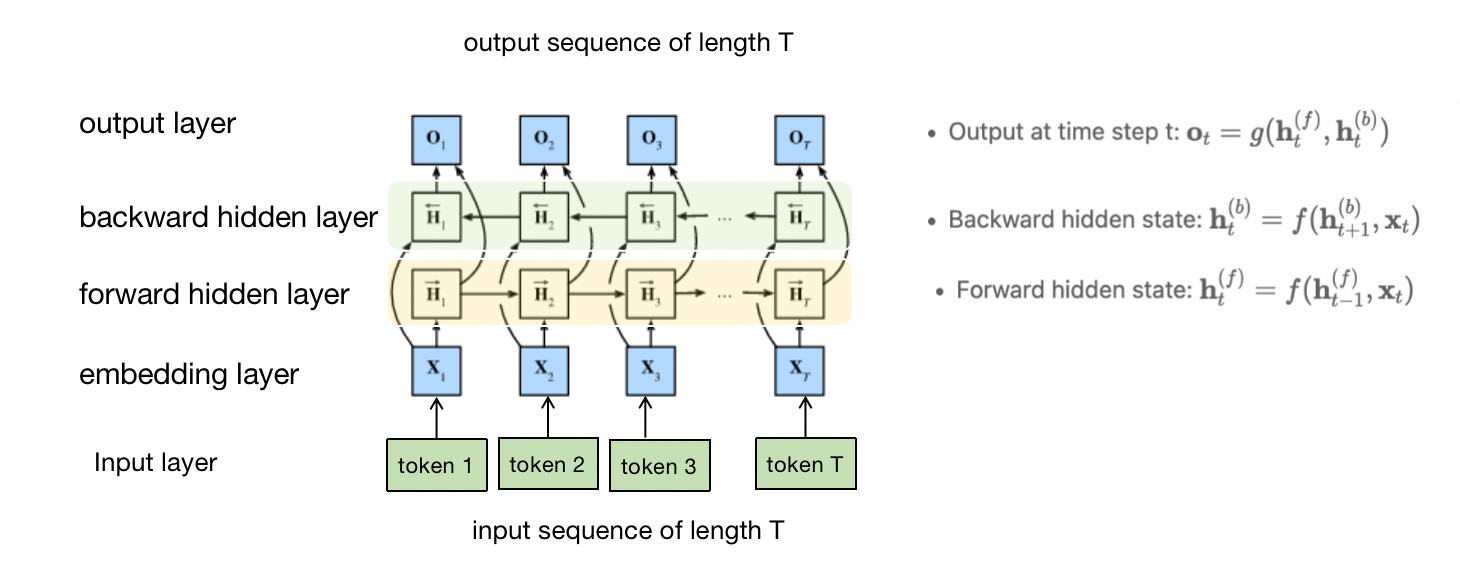

### simple BiSRN

**architecture for a bidirectional SRN with one hidden layer**

For each time step $t$:

- Input: t-th token of input sequence

- Embedding layer: $\mathbf{x}_t = \text{MLP}(w_t)$

- Forward hidden layer: $\mathbf{h}_t^{(f)} = \tanh(\mathbf{U}^{(f)} \mathbf{h}_{t-1}^{(f)}+\mathbf{W}^{(f)}\mathbf{x}_t + \mathbf{b}^{(1, f)} )$

- Backward hidden layer: $\mathbf{h}_t^{(b)} = \tanh(\mathbf{U}^{(b)} \mathbf{h}_{t+1}^{(b)}+\mathbf{W}^{(b)}\mathbf{x}_t + \mathbf{b}^{(1, b)} )$

- Output layer: $\mathbf{o}_t = \mathbf{V}\mathbf{h}_t^{({\color{red}{bi}})}+ \mathbf{b}^{(2)}$

Notations 

$\mathbf{h}_t^{({\color{red}{bi}})}$ is Concatenation of forward and backward hidden states: $\mathbf{h}_t^{({\color{red}{bi}})} = [\mathbf{h}_t^{(f)}; \mathbf{h}_t^{(b)}]$

$\mathbf{h}_t^{(f)}$ is forward hidden state and $\mathbf{h}_t^{(b)}$ is backward hidden state. 

matrices $\mathbf{U}^{(f)}$, $\mathbf{W}^{(f)}$, $\mathbf{U}^{(b)}$, $\mathbf{W}^{(b)}$ are the weight matrices for the forward and backward hidden layers, 

$\mathbf{b}^{(1, f)}$ and $\mathbf{b}^{(1, b)}$ are the bias vectors for the forward and backward hidden layers, respectively.

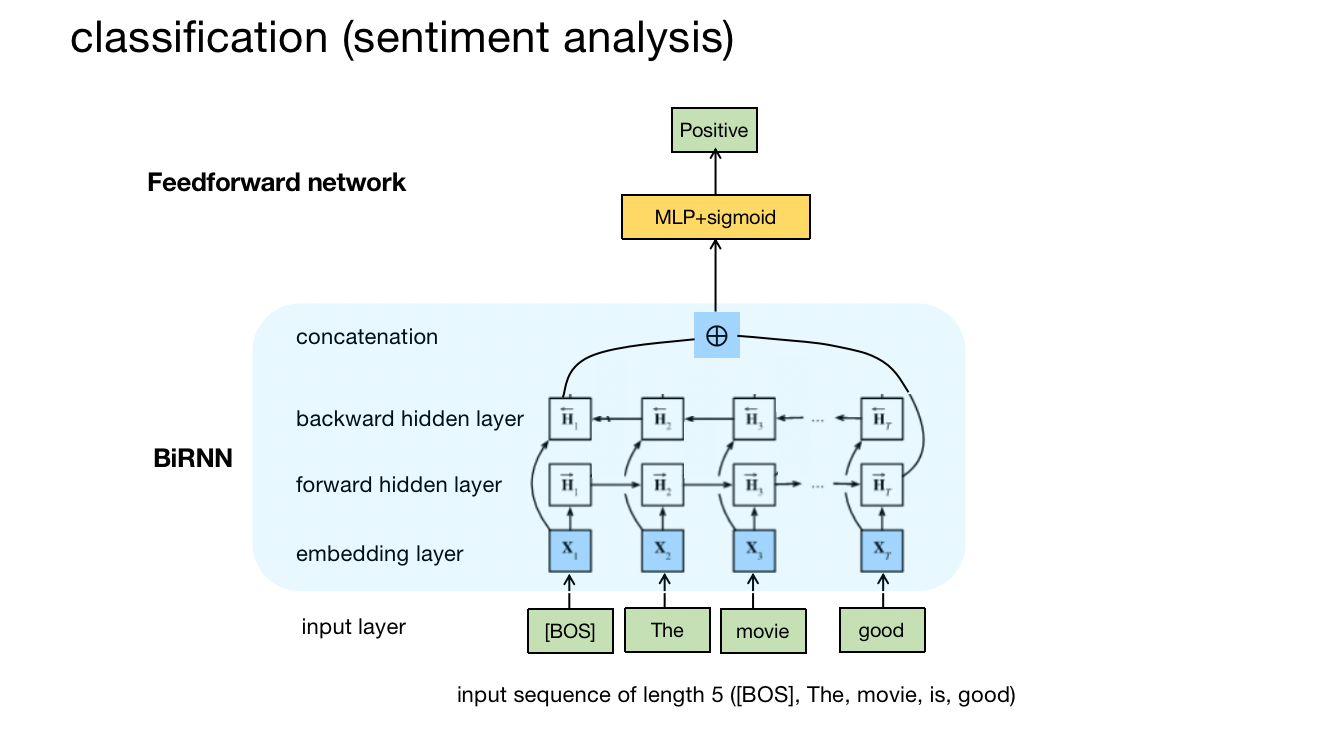

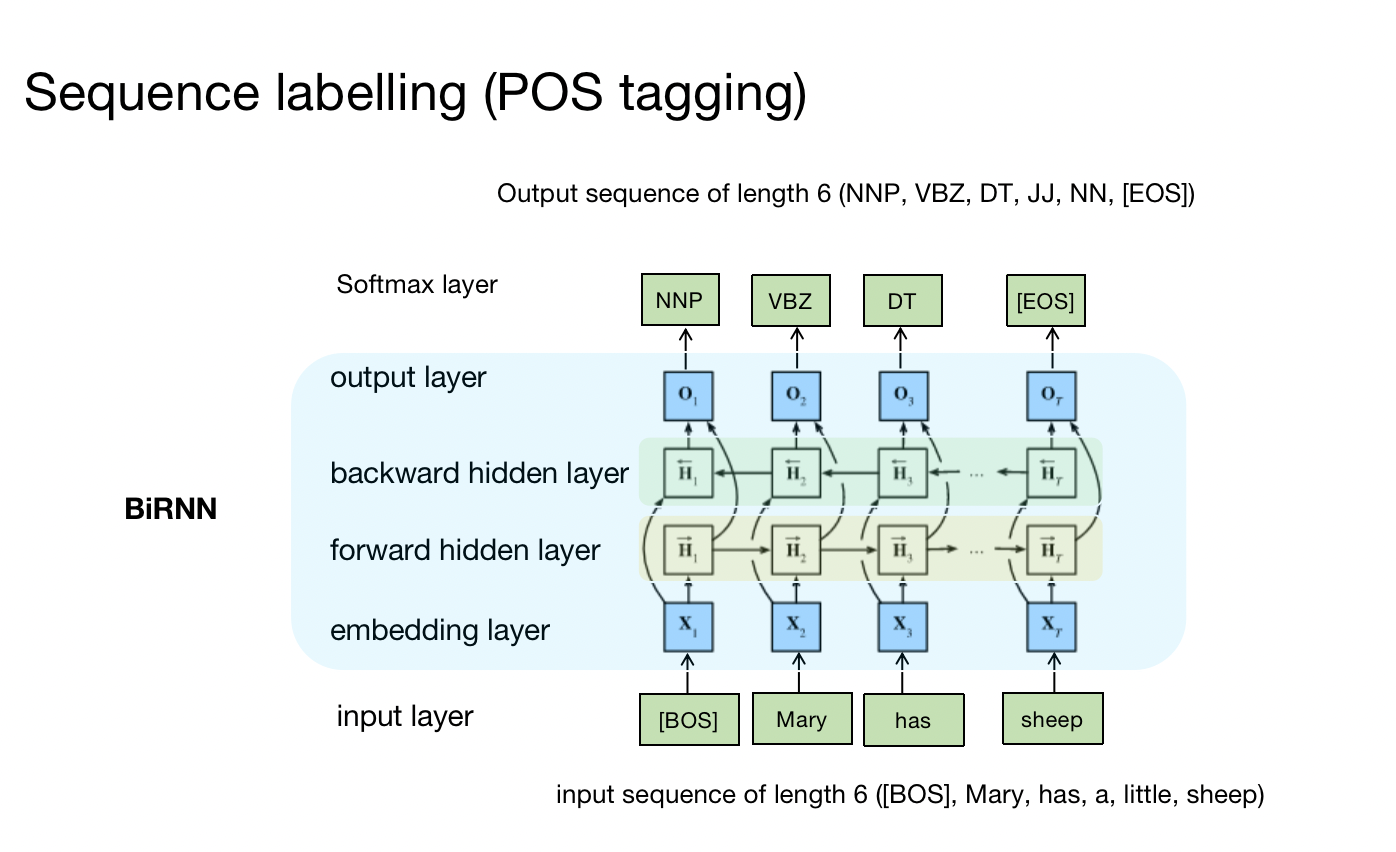

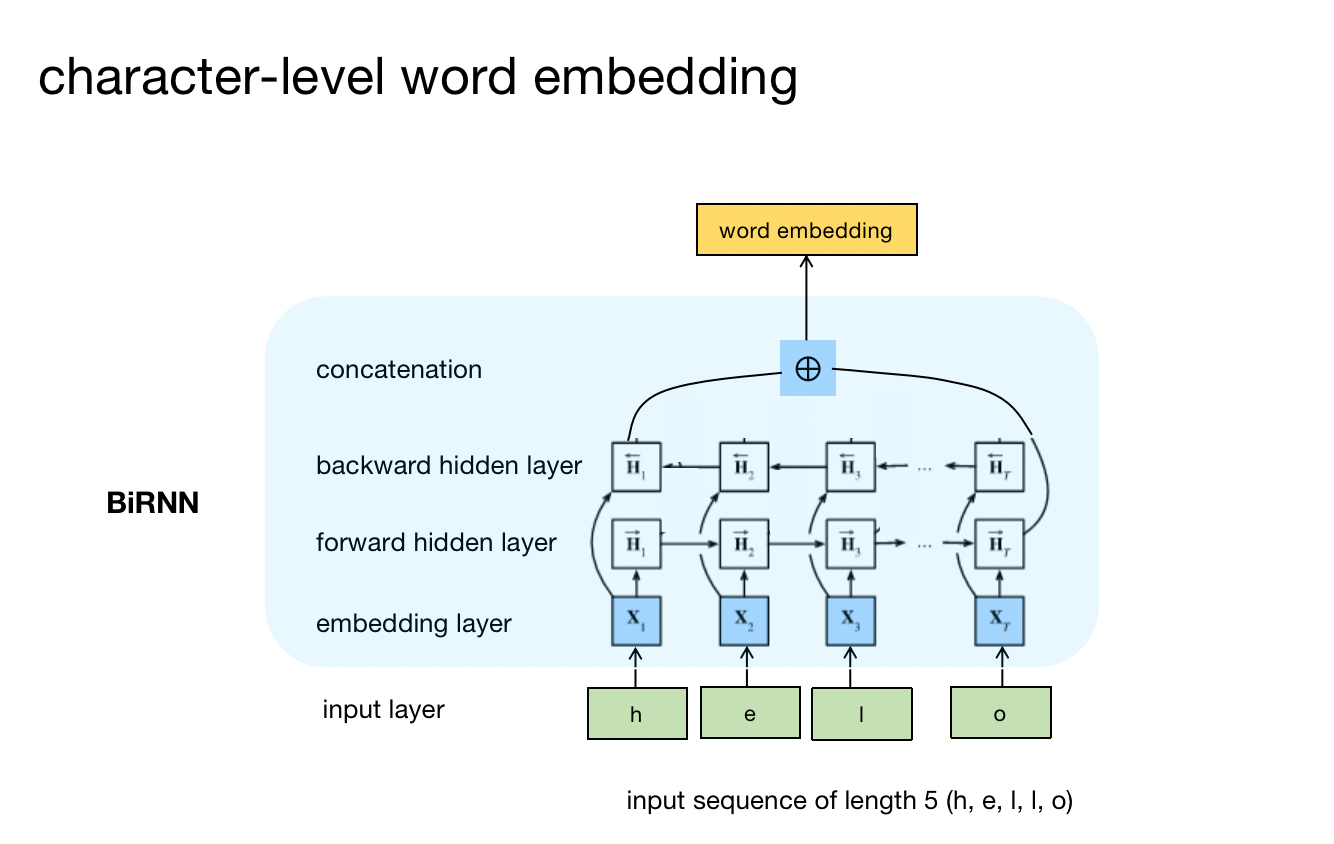

## stacked BiRNN

in a stacked bidirectional RNN, **forward and backward hidden states are concatenated at each layer** before being passed to the next layer.

For each time step $t$:

- Input: t-th token of input sequence

- Embedding layer: $\mathbf{x}_t = \text{MLP}(w_t)$

- Hidden layer $1$:

    Forward: $\mathbf{h}^{(1, f)}_t = \tanh(\mathbf{U}^{(1, f)} \mathbf{h}^{(1, f)}_{t-1} + \mathbf{W}^{(1, f)}\mathbf{x}_t + \mathbf{b}^{(1, f)})$

    Backward: $\mathbf{h}^{(1, b)}_t = \tanh(\mathbf{U}^{(1, b)} \mathbf{h}^{(1, b)}_{t+1} + \mathbf{W}^{(1, b)}\mathbf{x}_t + \mathbf{b}^{(1, b)})$

    Concatenation: $\mathbf{h}^{(1, {\color{red}{bi}})}_t = [\mathbf{h}^{(1, f)}_t; \mathbf{h}^{(1, b)}_t]$

    $$\cdots$$

- Hidden layer $L$:

    Forward: $\mathbf{h}^{(L, f)}t = \tanh(\mathbf{U}^{(L, f)} \mathbf{h}^{(L, f)}{t-1} + \mathbf{W}^{(L, f)}\mathbf{h}^{(L-1, {\color{red}{bi}})}_t + \mathbf{b}^{(L, f)})$

    Backward: $\mathbf{h}^{(L, b)}t = \tanh(\mathbf{U}^{(L, b)} \mathbf{h}^{(L, b)}{t+1} + \mathbf{W}^{(L, b)}\mathbf{h}^{(L-1, {\color{red}{bi}})}_t + \mathbf{b}^{(L, b)})$

    Concatenation: $\mathbf{h}^{(L, {\color{red}{bi}})}_t = [\mathbf{h}^{(L, f)}_t; \mathbf{h}^{(L, b)}_t]$

- Output layer: $\mathbf{o}_t = \mathbf{V}\mathbf{h}^{(L, {\color{red}{bi}})}_t + \mathbf{b}^{(L+1)}$

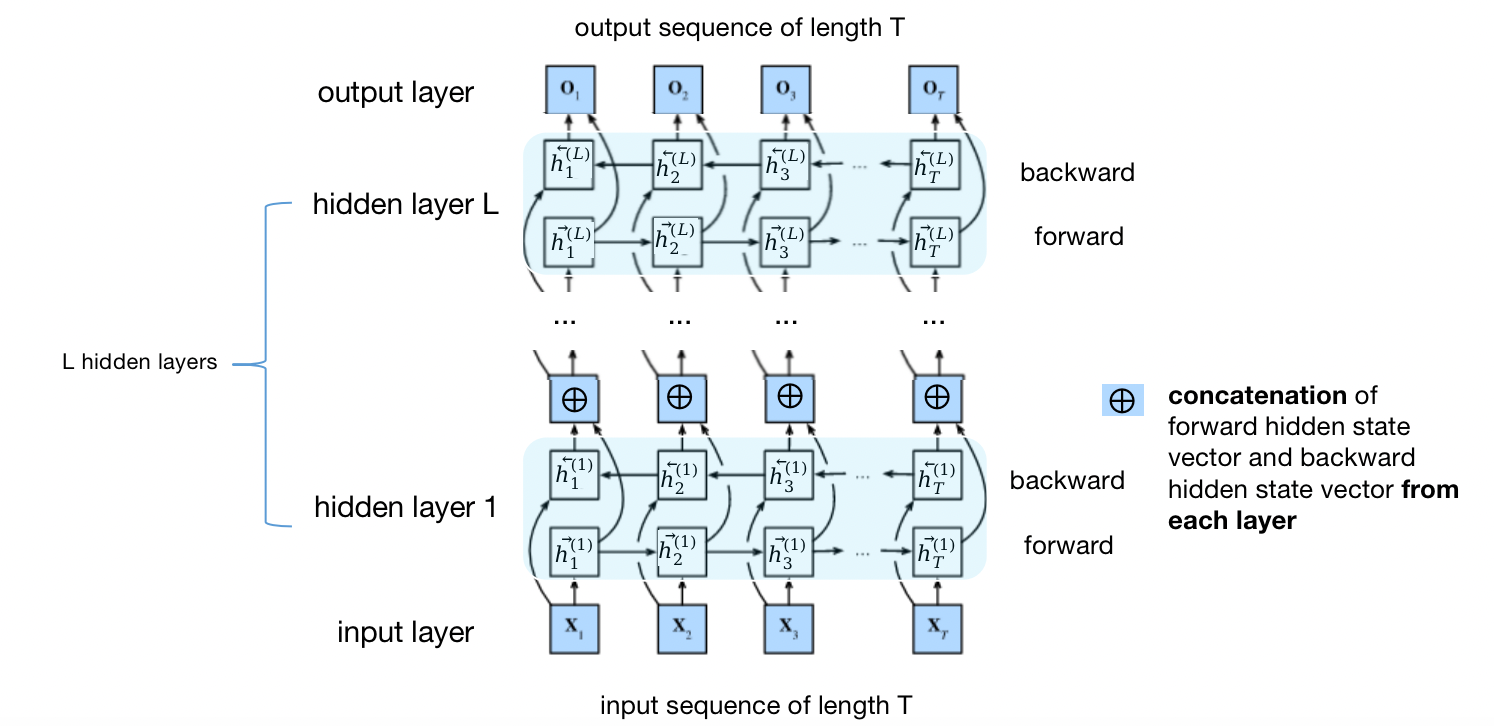

# stacked RNN

**stacked RNN is RNN has multiple hidden layers**

Here is an example of stacked RNN with $L$ hidden layers of SRN units

## architecture

For each time step $t$

- Input: t-th token of input sequence

- Embedding layer: $\mathbf{x}_t = \text{MLP}(w_t)$

- Hidden layer $1$: $\mathbf{h}^{(1)}_t= \tanh(\mathbf{U}^{(1)} \mathbf{h}^{(1)}_{t-1}+\mathbf{W}^{(1)}\mathbf{x}_t + \mathbf{b}^{(1)} )$

    $$\cdots$$

- Hidden layer $L$: $\mathbf{h}^{(L)}_t= \tanh(\mathbf{U}^{(L)}\mathbf{h}^{(L)}_{t-1}+\mathbf{W}^{(L)}\mathbf{h}^{(L-1)}_t + \mathbf{b}^{(L)})$

- Output layer: $\mathbf{o}_t= \mathbf{V}\mathbf{h}^{(L)}_t+ \mathbf{b}^{(L+1)}$

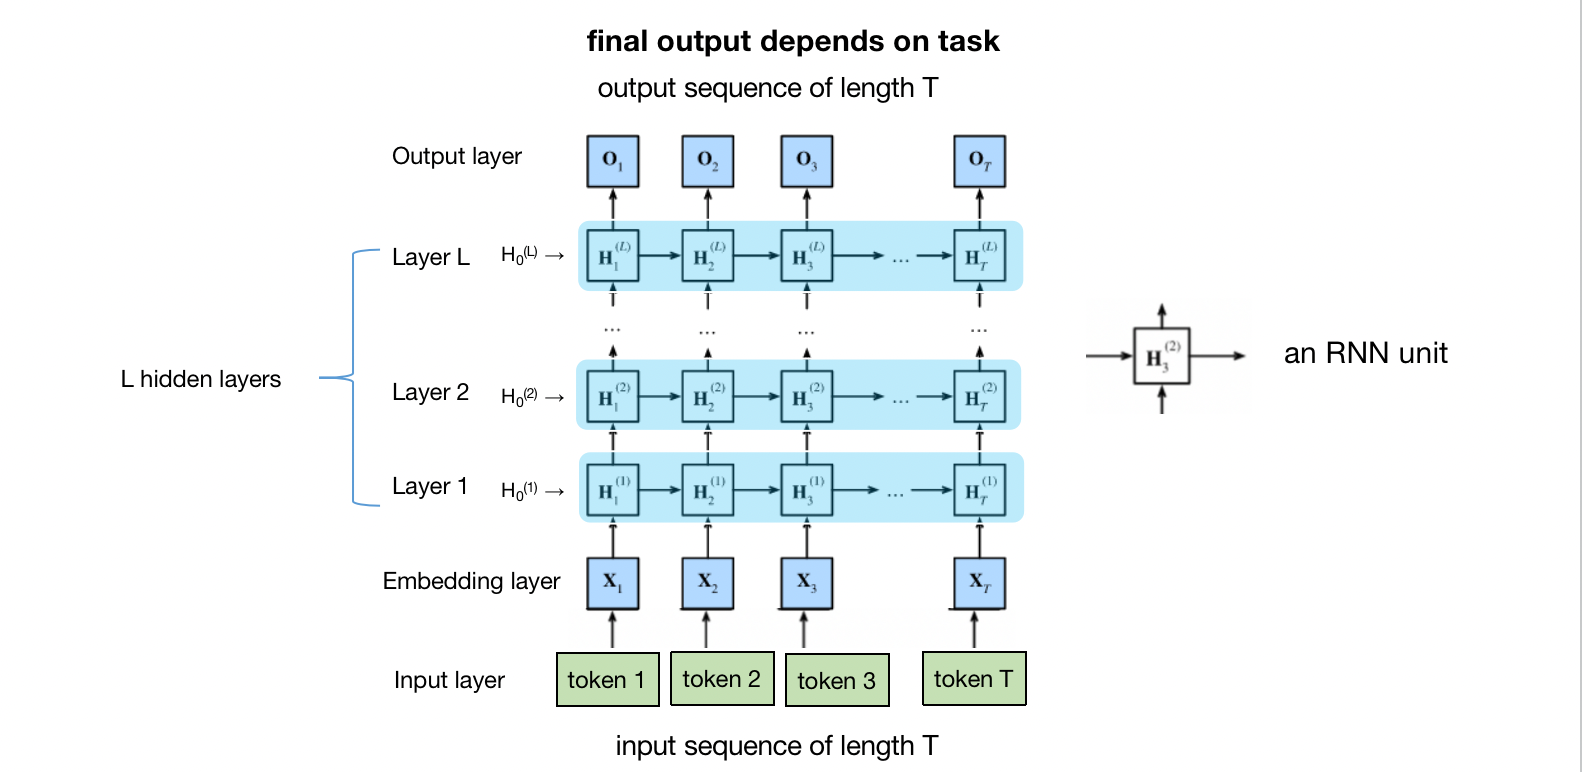

## training algorithm

1. **stacked RNN initialization**

    - initialize $L$ first hidden state $\mathbf{h}_0^{(1)}, ..., \mathbf{h}_0^{(L)}$ to $\mathbf{0}$

    - randomly initialize 
    
        $L$ recurrent weight matrice at each hidden layer $\mathbf{U}^{(1)}, ..., \mathbf{U}^{(L)}$ , 
        
        $L$ input weight matrice at each hidden layer $\mathbf{W}^{(1)}, ..., \mathbf{W}^{(L)}$
        
        one output weight matrice $\mathbf{V}$.


2. input: a sequence of $T$ tokens (word or character)

3. output: a sequence of length $T$ $[\mathbf{o}_1, ..., \mathbf{o}_T]^T$

4. final output depending on task,  can be 

    - seq2seq: a sequence of length $T$ $[\mathbf{y}_1, ..., \mathbf{y}_T]^T$

        $$\mathbf{y}_t=\text{softmax}(\mathbf{o}_t)$$

    - classification: a single label $\mathbf{y}_T$ calculated from **output layer at time step $T$**

        $$\mathbf{y}_T=\text{softmax}(\mathbf{o}_T)$$

5. compute cross entropy loss and SGD to update weights

# LSTM (Long Short-Term Memory networks)

A type of RNN designed to capture **long-term dependencies** by incorporating memory cells and gating mechanisms like **skip connection through time**


## architecture: memory cell

memory cell: core component of LSTM architecture, a unit responsible for storing and retaining information over long sequences, addressing the vanishing gradient problem commonly encountered in standard RNNs.

An LSTM cell contains the following key components:

- Gates: LSTM cells use 3 kinds of gates to regulate flow of information within unit:

    - Input gate: Decides how much new information from the current input should be added to the current cell state.

        $$
        i_t = \sigma(W_i \cdot [\mathbf{h}_{t-1}, \mathbf{x}_{t}] + \mathbf{b}_i)
        $$

    - Forget gate: Decides how much previous information from the previous cell state should be added to current cell state.

        $$
        f_t = \sigma(W_f \cdot [\mathbf{h}_{t-1}, \mathbf{x}_{t}] + \mathbf{b}_f)
        $$

        $\sigma$ is sigmoid function outputs a value between 0 and 1 and controls how much of an input should be let through

    - Output gate: decides how much information from updated cell state should be used to compute the current hidden state $\mathbf{h}_t$, which is passed to the next layer or time step.

        $$
        o_t = \sigma(V \cdot [\mathbf{h}_{t-1}, \mathbf{x}_{t}] + \mathbf{b}_o)
        $$

- Cell state $\mathbf{c}_t$: a vector that runs through the entire LSTM unit and allows the network to store information across time steps. 

    It can be selectively updated, read, or cleared based on the input data and network's internal gating mechanisms.

    Cell state is a weighted average of previous hidden state and new hidden state

    $$
    \mathbf{c}_t = f_t \odot \mathbf{c}_{t-1} + i_t \odot \tilde{\mathbf{c}}_t
    \\[1em]
    \tilde{\mathbf{c}}_t= \tanh (W_c \cdot [\mathbf{h}_{t-1}, \mathbf{x}_{t}] + \mathbf{b}_c)
    $$

    $\odot$ Elementwise (Hadamard) matrix product
    
- current hidden state $\mathbf{h}_t$ is computed as weighted average of previous hidden state $\mathbf{h}_{t-1}$ and current input $\mathbf{x}_{t}$ multiplied by running state $\mathbf{c}_t$

    $$
    \mathbf{h}_t = o_t \odot \tanh (\mathbf{c}_t)
    $$

<img src='https://miro.medium.com/v2/resize:fit:1400/1*goJVQs-p9kgLODFNyhl9zA.gif' />

## application

Language identification (Gonzalez-Dominguez et al., 2014)

Paraphrase detection (Cheng & Kartsaklis, 2015)

Speech recognition (Graves, Abdel-Rahman, & Hinton, 2013)

Handwriting recognition (Graves & Schmidhuber, 2009)

Music composition (Eck & Schmidhuber, 2002)

lyric generation (Potash, Romanov, & Rumshisky, 2015)

Robot control (Mayer et al., 2008)

Natural language generation (Wen et al. 2015) (best paper at EMNLP)

Named entity recognition (Hammerton, 2003)

## ElMo (BiLSTM)

ElMo (Embeddings from Language Models) is a contextual word embedding model with bidirectional LSTM architecture.

1. Character Embeddings: Represent each word with its character-level embeddings using a Convolutional Neural Network (CNN) followed by max-pooling.

    $$x_{c} = \text{CNN}(w_{c})$$

2. Bi-directional Language Models (BiLMs): Train a bi-directional LSTM on a large corpus to learn contextual word embeddings.

    - Forward LSTM: $h_{t}^{\text{forward}} = \text{LSTM}^{\text{forward}}(x_{t}, h_{t-1}^{\text{forward}})$

    - Backward LSTM: $h_{t}^{\text{backward}} = \text{LSTM}^{\text{backward}}(x_{t}, h_{t+1}^{\text{backward}})$

3. Concatenation of Embeddings: Concatenate the embeddings from the forward and backward LSTMs for each word.

    $$h_{t} = \text{Concat}(h_{t}^{\text{forward}}, h_{t}^{\text{backward}})$$

4. Weighted Sum of Layer Representations: Compute a weighted sum of the LSTM layer representations for each word to create the final ElMo embedding.

    $$E_{t} = \gamma \sum_{j=0}^{L} s_{j} h_{t}^{j}$$

Here, $w_{c}$ represents the character-level representation of a word, 

$x_{t}$ is the character embedding of the word at position $t$, 

$h_{t}^{\text{forward}}$ and $h_{t}^{\text{backward}}$ are the hidden states of the forward and backward LSTMs at time $t$, 

$E_{t}$ is the final ElMo embedding for the word at position $t$. 

$L$ is the number of layers in the LSTM, 

$s_{j}$ are the softmax-normalized weights, 

$\gamma$ is a scaling factor.

ELMo uses **character-level** word embeddings for several reasons:

- Handling Out-of-Vocabulary (OOV) words: Character-level embeddings can easily generate representations for any word, including OOV words, because they are based on the characters that make up the word rather than the word itself. This allows ELMo to generate embeddings for words that were not seen during training.

- Morphological information: Character-level embeddings can capture morphological information, which can be especially useful for languages with rich morphology or when dealing with derived words and inflections. This helps ELMo generate meaningful embeddings for words with shared roots, prefixes, or suffixes

- Robustness to spelling variations or typos: Character-level embeddings can still capture meaningful information about the word based on its characters. This is particularly useful when working with noisy text data, such as social media posts or web comments.

- Compact representation: Using character-level embeddings reduces the size of the vocabulary, as it only needs to maintain embeddings for individual characters rather than all possible words. 

# GRU

GRU (Gated Recurrent Unit)

- A type of RNN designed to capture **long-term dependencies** by gating mechanisms like **skip connection through time**

- A simplified variant of the LSTM unit. 

  2 gates: **update gate and reset gate**. 

  same activation tanh and sigmoid as LSTM

  **combine input gate and forget gate into one update gate**

  **combine cell state and hidden state into one hidden state**

- pros:  Fewer parameters than LSTMs, resulting in faster training times and reduced memory usage.

- **Cons**:

  - can't count effectively due to lack of additional cell state as LSTM.

  - Still more computationally intensive than SRN

## Architecture: GRU unit

For time step $t$

- Candidate hidden state: $\tilde{h}_t = \tanh(W x_t + U_h (r_t \odot h_{t-1}))$

- Final hidden state: $h_t = (1 - z_t) \odot h_{t-1} + z_t \odot \tilde{h}_t$

- 2 kinds of Gate

    - Reset gate: $r_t = \sigma(W_r x_t + U_r h_{t-1})$

    - Update gate: $z_t = \sigma(W_z x_t + U_z h_{t-1})$


Notations:

$x_t$: input vector at time step $t$

$h_{t-1}$: hidden state at the previous time step $(t-1)$, $h_t$: hidden state at the current time step $t$

$\tilde{h}_t$: candidate hidden state at time step $t$


$W_z, W_r, W$: weight matrices for input vector $x_t$ corresponding to the update gate, reset gate, and candidate hidden state, respectively

$U_z, U_r, U_h$: weight matrices for previous hidden state $h_{t-1}$ corresponding to the update gate, reset gate, and candidate hidden state, respectively

$\sigma(\cdot)$: sigmoid activation function

$\tanh(\cdot)$: hyperbolic tangent activation function

$\odot$: element-wise (Hadamard) product

<img src='https://miro.medium.com/v2/resize:fit:1400/1*lNNJOWnMjxLzdUnUQqwKcw.gif' />